In [13]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import events

# FILE = 'dataset/bob_all_processed_mins/2020_76.csv'
FILE = 'dataset/transformed_minutes/interval_15m/2020_76-qhs.csv'
# FILE = 'dataset/_bob_useful_processed_mins/2020_76-qhs_20190601-20190701.csv'

df = pd.read_csv(FILE, dtype={
        't_i_1': float,
        't_i_2': float,
        't_i_3': float,
        't_i_4': float,
        't_o': float,
        'weight_kg': float,
        "weight_delta": float,
        'numeric.time': float,
        'h': float,
        't': float,
        'p': float,
    }, low_memory=False, parse_dates=['time'], index_col='time', date_format='%Y-%m-%d %H:%M:%S')
df = df.infer_objects(copy=False)

events_indexes = events.get_events_indexes(df)

swarming_indexes = events_indexes[0]
queencell_indexes = events_indexes[1]
feeding_indexes = events_indexes[2]
honey_indexes = events_indexes[3]
treatment_indexes = events_indexes[4]
died_indexes = events_indexes[5]
    
print (f'Swarming {len(swarming_indexes)}')
print (f'Queencell {len(queencell_indexes)}')
print (f'Feeding {len(feeding_indexes)}')
print (f'Honey {len(honey_indexes)}')
print (f'Treatment {len(treatment_indexes)}')
print (f'Died {len(died_indexes)}')
print ('========================================')

Swarming 1
Queencell 1
Feeding 0
Honey 1
Treatment 0
Died 0


# Visualize

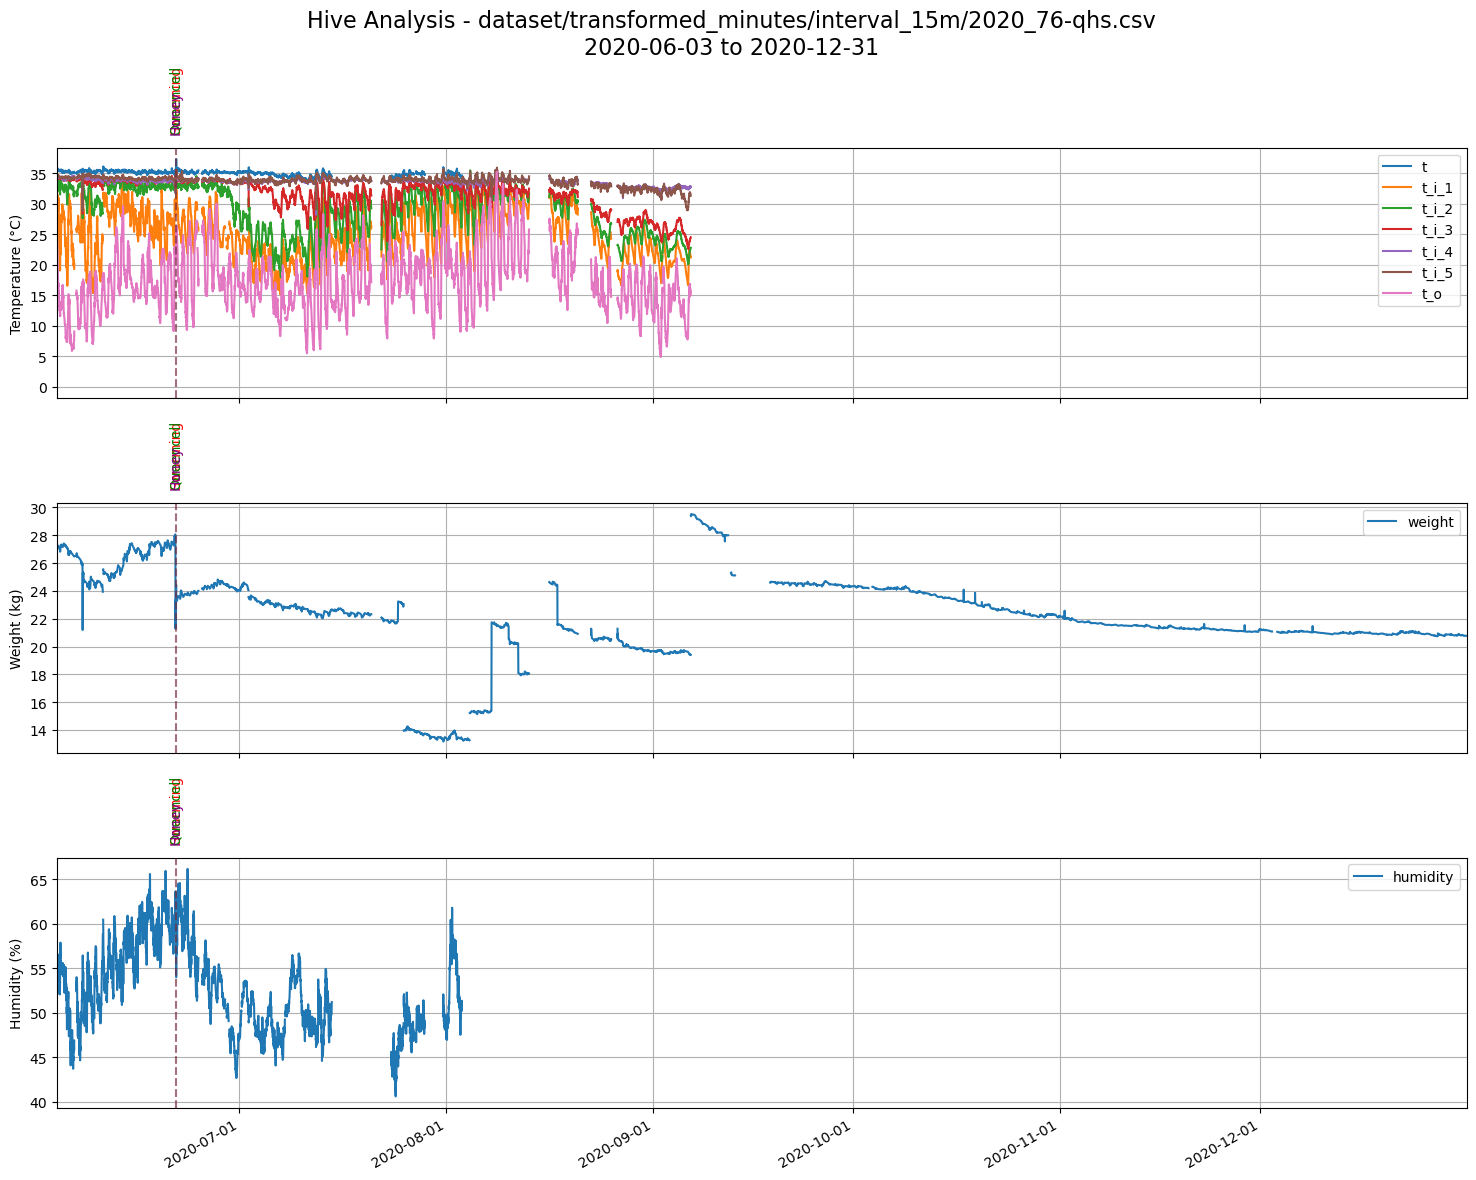

In [14]:
start_date =  df.index.min()
# start_date = pd.to_datetime('2019-09-01')


end_date = df.index.max()
# end_date = pd.to_datetime('2019-10-01')

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle(f'Hive Analysis - {FILE}\n{start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}', 
            fontsize=16)

# Plot 1: Temperatures
ax1.plot(df.index, df['t'], label='t')
ax1.plot(df.index, df['t_i_1'], label='t_i_1')
ax1.plot(df.index, df['t_i_2'], label='t_i_2')
ax1.plot(df.index, df['t_i_3'], label='t_i_3')
ax1.plot(df.index, df['t_i_4'], label='t_i_4')
ax1.plot(df.index, df['t_i_5'], label='t_i_5')
ax1.plot(df.index, df['t_o'], label='t_o')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()
ax1.grid(True)

# Plot 2: Weight
ax2.plot(df.index, df['weight_kg'], label='weight')
ax2.set_ylabel('Weight (kg)')
ax2.legend()
ax2.grid(True)

# Plot 3: Humidity
ax3.plot(df.index, df['h'], label='humidity')
ax3.set_ylabel('Humidity (%)')
ax3.legend()
ax3.grid(True)

# Add event markers to all plots
events_dict = {
    'Swarming': swarming_indexes,
    'Queencell': queencell_indexes,
    'Feeding': feeding_indexes,
    'Honey': honey_indexes,
    'Treatment': treatment_indexes,
    'Died': died_indexes
}

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for ax in [ax1, ax2, ax3]:
    # Set x-axis limits
    ax.set_xlim(start_date, end_date)
    
    for (event_name, indexes), color in zip(events_dict.items(), colors):
        # Filter events to only show those within the date range
        filtered_indexes = [idx for idx in indexes if start_date <= idx <= end_date]
        for idx in filtered_indexes:
            ax.annotate(event_name, 
                       xy=(idx, ax.get_ylim()[1]),
                       xytext=(0, 10), textcoords='offset points',
                       ha='center', va='bottom',
                       color=color,
                       rotation=90)
            ax.axvline(x=idx, color=color, linestyle='--', alpha=0.3)

# Format x-axis
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.tight_layout()
plt.show()

# Slice useful 

In [15]:
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2020-07-01')

df_slice = df.loc[start_date:end_date]
df_slice

,X.1,X,key,t_i_1,t_i_2,t_i_3,t_i_4,t_i_5,t_o,weight_kg,...,treatment.next.dif,died.next.dif,swarming.next.dif,swarming,queencell,feeding,honey,treatment,died,time.1
time,,,,,,,,,,,,,,,,,,,,,
2020-06-03 16:00:00,1.0,222725.0,76.0,31.878182,32.929091,34.244545,34.502727,34.658182,24.420909,26.908318,...,NaN,NaN,1536340.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-03 16:00:00
2020-06-03 16:15:00,12.0,222736.0,76.0,31.924000,32.796667,34.200000,34.449667,34.598333,23.942000,26.945867,...,NaN,NaN,1535680.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-03 16:15:00
2020-06-03 16:30:00,27.0,222751.0,76.0,31.833333,32.758000,34.185000,34.381000,34.528000,23.269333,26.980233,...,NaN,NaN,1534780.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-03 16:30:00
2020-06-03 16:45:00,42.0,222766.0,76.0,31.650333,32.634000,34.214000,34.384000,34.588000,22.889333,27.007533,...,NaN,NaN,1533880.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-03 16:45:00
2020-06-03 17:00:00,57.0,222781.0,76.0,31.258000,32.708000,34.208000,34.336333,34.588000,22.008333,27.038700,...,NaN,NaN,1532980.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-03 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:00:00,37306.0,262021.0,76.0,24.221000,28.940000,33.530000,33.504000,33.635333,16.928000,24.030067,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-30 23:00:00
2020-06-30 23:15:00,37321.0,262036.0,76.0,24.234333,28.871333,33.544000,33.516000,33.566000,16.932000,24.027367,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-30 23:15:00
2020-06-30 23:30:00,37336.0,262051.0,76.0,24.060000,28.650000,33.564000,33.526000,33.526000,16.990000,24.026300,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-30 23:30:00


In [19]:
fs = FILE.split('/')
file = fs[-1].replace('2020_', '').replace('2019_', '').replace('2021_', '').replace('2022_', '').replace('.csv', '')
output_filename = f"{file}_{start_date.strftime('%Y%m%d')}-{end_date.strftime('%m%d')}"
df_slice.to_csv(f'dataset/_bob_useful_processed_mins/{output_filename}.csv')